In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# text preprocessing
from datetime import datetime
# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
nlp = spacy.load('en', parse=True, tag=True, entity=True)

## Modeling

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


## Warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
#Reading data for modelling 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/product_review_p4.csv',index_col=False)


In [ ]:
#df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Rating', 'verified', 'reviewerID',
       'asin', 'style', 'reviewerName', 'DateTime', 'vote', 'review_sentiment',
       'category', 'description', 'title', 'also_buy', 'brand', 'feature',
       'rank', 'also_view', 'similar_item', 'review_text', 'rating_class',
       'clean_text', 'token'],
      dtype='object')

In [4]:
# Extracting only useful column for Tableau EDA prosective
df_tableau = df[['Rating','reviewerID','style','review_sentiment','DateTime','category','also_buy','brand','feature','also_view']]

In [5]:
df_tableau.tail()

,Rating,reviewerID,style,review_sentiment,DateTime,category,also_buy,brand,feature,also_view
45415,4,A2Y36VUWFFBOZR,{'Color:': ' Gold'},POSITIVE,2018-03-10,"['Cell Phones & Accessories', 'Cell Phones', '...","['B0784VB4JX', 'B06XQQBC3V', 'B017IMJOD6', 'B0...",BLU,"['Super 5,000mAh Massive Battery. OTG capabili...","['B01MU0YKUB', 'B01IVV81NC', 'B01NAU4NV8', 'B0..."
45416,5,A176KFNUGWY2ZE,{'Color:': ' Silver'},POSITIVE,2018-03-08,"['Cell Phones & Accessories', 'Cell Phones', '...","['B0784VB4JX', 'B06XQQBC3V', 'B017IMJOD6', 'B0...",BLU,"['Super 5,000mAh Massive Battery. OTG capabili...","['B01MU0YKUB', 'B01IVV81NC', 'B01NAU4NV8', 'B0..."
45417,1,A6NPK75OUWM9N,"{'Size:': ' 16 GB', 'Color:': ' Space Gray'}",POSITIVE,2018-09-28,"['Cell Phones & Accessories', 'Cell Phones', '...","['B00DD62R40', 'B018P3KPNA', 'B01JLR6ZWO', 'B0...",Apple,['Renewed products look and work like new. The...,[]
45418,5,A3TDOO7WG0SS51,{'Color:': ' X10 Silver'},NEGATIVE,2018-09-15,"['Cell Phones & Accessories', 'Cell Phones', '...","['B07D3MGFBZ', 'B078NLN4MG']",DOOGEE,"['4G NETWROK, SMOOTH CONNECTION - Support : 2G...",[]
45419,5,A2HVSDMYQPAMUH,{'Color:': ' Black'},POSITIVE,2017-09-03,"['Cell Phones & Accessories', 'Cell Phones', '...","['B01KA3A1RI', 'B00NF4SWLW', 'B01E9ILNUE', 'B0...",Samsung,['Only select sellers who maintain a high perf...,"['B00PHJI28G', 'B01CPIYNQG', 'B01NC2MEJP', 'B0..."


In [6]:
# Save in in csv mode to do EDA in Tableau
df_tableau.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/TableauEDA.csv')

In [ ]:
#df.head()

,Unnamed: 0,Unnamed: 0.1,Rating,verified,reviewerID,asin,style,reviewerName,DateTime,vote,review_sentiment,category,description,title,also_buy,brand,feature,rank,also_view,similar_item,review_text,rating_class,clean_text,token
0,0,654,1,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Old-and-Wise,2004-09-20,2.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],NaN,Bad reception This phone is ugly and heavy and...,bad,bad reception phone ugly heavy terrible user i...,"['bad', 'reception', 'phone', 'ugly', 'heavy',..."
1,1,655,4,False,A1ACM1CBGORBN1,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Sherry Berry,2004-07-23,15.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],NaN,Pretty good phone.. an improvement from my v20...,good,pretty good phone improvement samsung decide t...,"['pretty', 'good', 'phone', 'improvement', 'sa..."
2,2,656,3,False,A2V48Q03FZUOSD,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Benjamin David,2004-07-05,11.0,NEGATIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],NaN,Not as user friendly as the Motorola V300- Thi...,good,not user friendly motorola samsung phone not m...,"['not', 'user', 'friendly', 'motorola', 'samsu..."
3,3,657,5,True,A1V3TRGWOMA8LC,B0000E3GWH,{'Package Type:': ' Standard Packaging'},James Beswick,2004-04-11,4.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],NaN,The best phone I've ever owned ..and I'm from ...,good,best phone own be europe phone network better ...,"['best', 'phone', 'own', 'be', 'europe', 'phon..."
4,4,658,3,False,A3NOBH42C7UI5M,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Kepela,2004-02-18,12.0,POSITIVE,"['Cell Phones & Accessories', 'Cell Phones', '...","[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],NaN,I love the phone but it has some real problems...,good,love phone real problems phone amazingly light...,"['love', 'phone', 'real', 'problems', 'phone',..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45420 entries, 0 to 45419
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        45420 non-null  int64 
 1   Unnamed: 0.1      45420 non-null  int64 
 2   Rating            45420 non-null  int64 
 3   verified          45420 non-null  bool  
 4   reviewerID        45420 non-null  object
 5   asin              45420 non-null  object
 6   style             45420 non-null  object
 7   reviewerName      45420 non-null  object
 8   DateTime          45420 non-null  object
 9   vote              45420 non-null  object
 10  review_sentiment  45420 non-null  object
 11  category          45420 non-null  object
 12  description       45420 non-null  object
 13  title             45420 non-null  object
 14  also_buy          45420 non-null  object
 15  brand             45365 non-null  object
 16  feature           45420 non-null  object
 17  rank        

In [8]:
# Droping unncessary data which is not used for modelling
df = df.drop(['Rating','reviewerName','DateTime','description','category','title','also_view','also_buy',
              'brand','similar_item','verified','style','vote','feature'],axis=1)


In [9]:
df.head()

,Unnamed: 0,Unnamed: 0.1,reviewerID,asin,review_sentiment,rank,review_text,rating_class,clean_text,token
0,0,654,A5JLAU2ARJ0BO,B0000E3GWH,NEGATIVE,"['>#3,059,436 in Cell Phones & Accessories (Se...",Bad reception This phone is ugly and heavy and...,bad,bad reception phone ugly heavy terrible user i...,"['bad', 'reception', 'phone', 'ugly', 'heavy',..."
1,1,655,A1ACM1CBGORBN1,B0000E3GWH,POSITIVE,"['>#3,059,436 in Cell Phones & Accessories (Se...",Pretty good phone.. an improvement from my v20...,good,pretty good phone improvement samsung decide t...,"['pretty', 'good', 'phone', 'improvement', 'sa..."
2,2,656,A2V48Q03FZUOSD,B0000E3GWH,NEGATIVE,"['>#3,059,436 in Cell Phones & Accessories (Se...",Not as user friendly as the Motorola V300- Thi...,good,not user friendly motorola samsung phone not m...,"['not', 'user', 'friendly', 'motorola', 'samsu..."
3,3,657,A1V3TRGWOMA8LC,B0000E3GWH,POSITIVE,"['>#3,059,436 in Cell Phones & Accessories (Se...",The best phone I've ever owned ..and I'm from ...,good,best phone own be europe phone network better ...,"['best', 'phone', 'own', 'be', 'europe', 'phon..."
4,4,658,A3NOBH42C7UI5M,B0000E3GWH,POSITIVE,"['>#3,059,436 in Cell Phones & Accessories (Se...",I love the phone but it has some real problems...,good,love phone real problems phone amazingly light...,"['love', 'phone', 'real', 'problems', 'phone',..."


In [10]:
df_copy = df.copy()

In [11]:
df['rating_class'].values

array(['bad', 'good', 'good', ..., 'bad', 'good', 'good'], dtype=object)

In [12]:
# convert label to a numerical variable
df['rating_class'] = df.rating_class.map({'bad':0, 'good':1})


In [13]:
# Drop unncessary columns
df = df.drop(['Unnamed: 0.1','Unnamed: 0','reviewerID','asin','review_sentiment','rank','review_text','token'],axis=1)

In [14]:
# Checking null values
df['clean_text'].isnull().sum()

9

In [15]:
# Drop null values from clean_text column
df = df.dropna(subset = ['clean_text'])

In [16]:
df['clean_text'].isnull().sum()

0

In [17]:
df.head()

,rating_class,clean_text
0,0,bad reception phone ugly heavy terrible user i...
1,1,pretty good phone improvement samsung decide t...
2,1,not user friendly motorola samsung phone not m...
3,1,best phone own be europe phone network better ...
4,1,love phone real problems phone amazingly light...


In [18]:
# Rename rating class
df.rename(columns={"rating_class": "Positivity"}, inplace=True)


In [19]:
df.head()

,Positivity,clean_text
0,0,bad reception phone ugly heavy terrible user i...
1,1,pretty good phone improvement samsung decide t...
2,1,not user friendly motorola samsung phone not m...
3,1,best phone own be europe phone network better ...
4,1,love phone real problems phone amazingly light...


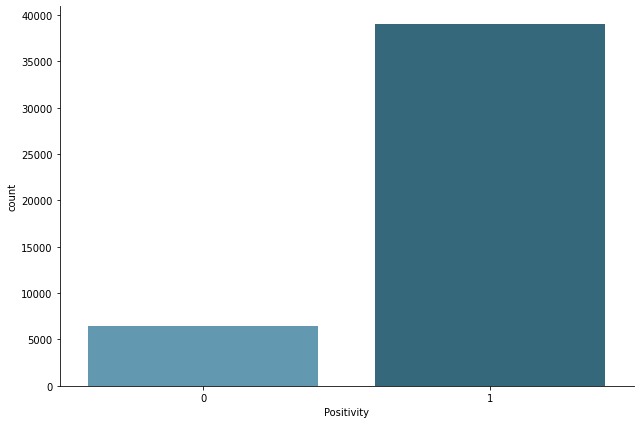

In [20]:
sns.catplot(x="Positivity", data=df, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

The bar chat below showing a comparison between positive and negative reviews using phone dataset

In [21]:
#Split data into train and test 
x = df['clean_text']
y = df['Positivity']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)


text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])

text_clf.fit(X_train,y_train)

predictions = text_clf.predict(X_test)

print(confusion_matrix(y_test,predictions))
cm = confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))

[[   76  2092]
 [    0 12818]]
              precision    recall  f1-score   support

           0       1.00      0.04      0.07      2168
           1       0.86      1.00      0.92     12818

    accuracy                           0.86     14986
   macro avg       0.93      0.52      0.50     14986
weighted avg       0.88      0.86      0.80     14986



### This looks nice. We got an accuracy of ~86% on the test set.


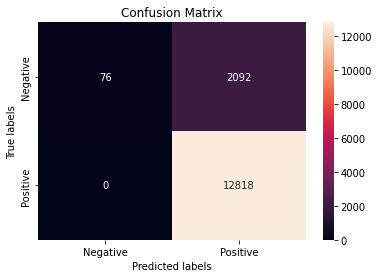

In [22]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

True Positives (TP) - These are the correctly predicted positive values which
means that the value of actual class is yes and the value of predicted class is also yes.

:False Positives (FP) – When actual class is no and predicted class is yes.


True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.


False Negatives (FN) – When actual class is yes but predicted class in no.


Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best.

Accuracy = TP+TN/TP+FP+FN+TN

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. 

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Weighted average scores:
The sum of the scores of all classes after multiplying their respective class proportions. 

It is the simple mean of scores of all classes. So, macro- average recall is 

---

the mean of the recalls of all the classes.